In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [2]:
train = pd.read_csv("/kaggle/input/spaceship-titanic/train.csv")
test = pd.read_csv("/kaggle/input/spaceship-titanic/test.csv")

# ****Data exploration****

In [3]:
train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [4]:
test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [5]:
train.info()
print("---"*70)
print("---"*70)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB
----------------------------------------------------------------------------------------------------------------------------------------------

In [6]:
train.corr()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
Age,1.000000,0.068723,0.130421,0.033133,0.123970,0.101007,-0.075026
RoomService,0.068723,1.000000,-0.015889,0.054480,0.010080,-0.019581,-0.244611
FoodCourt,0.130421,-0.015889,1.000000,-0.014228,0.221891,0.227995,0.046566
ShoppingMall,0.033133,0.054480,-0.014228,1.000000,0.013879,-0.007322,0.010141
Spa,0.123970,0.010080,0.221891,0.013879,1.000000,0.153821,-0.221131
VRDeck,0.101007,-0.019581,0.227995,-0.007322,0.153821,1.000000,-0.207075
Transported,-0.075026,-0.244611,0.046566,0.010141,-0.221131,-0.207075,1.000000


                   Age  RoomService  FoodCourt  ShoppingMall       Spa  \
Age           1.000000     0.068723   0.130421      0.033133  0.123970   
RoomService   0.068723     1.000000  -0.015889      0.054480  0.010080   
FoodCourt     0.130421    -0.015889   1.000000     -0.014228  0.221891   
ShoppingMall  0.033133     0.054480  -0.014228      1.000000  0.013879   
Spa           0.123970     0.010080   0.221891      0.013879  1.000000   
VRDeck        0.101007    -0.019581   0.227995     -0.007322  0.153821   
Transported  -0.075026    -0.244611   0.046566      0.010141 -0.221131   

                VRDeck  Transported  
Age           0.101007    -0.075026  
RoomService  -0.019581    -0.244611  
FoodCourt     0.227995     0.046566  
ShoppingMall -0.007322     0.010141  
Spa           0.153821    -0.221131  
VRDeck        1.000000    -0.207075  
Transported  -0.207075     1.000000  


<AxesSubplot:>

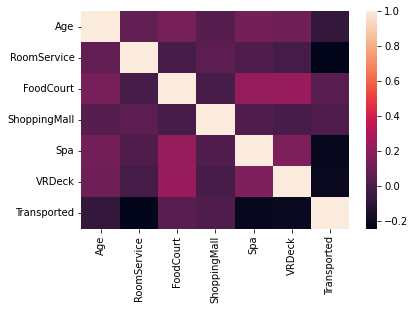

In [7]:
import seaborn as sns
print(train.corr())

sns.heatmap(train.corr())

# **Data Cleaning**

In [8]:
trainx = train.drop(["RoomService","ShoppingMall","Spa","VRDeck"],axis = 1)

In [9]:
trainx.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,FoodCourt,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,9.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,3576.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,1283.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,70.0,Willy Santantines,True


In [10]:
trainx = train.drop(["Destination","Cabin","HomePlanet","Name"],axis = 1)

In [11]:
testx = test.drop(["Destination","Cabin","HomePlanet","Name" ],axis = 1)

In [12]:
trainx

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,False,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,0002_01,False,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,0003_01,False,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,0003_02,False,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,0004_01,False,16.0,False,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,False,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False
8689,9278_01,True,18.0,False,0.0,0.0,0.0,0.0,0.0,False
8690,9279_01,False,26.0,False,0.0,0.0,1872.0,1.0,0.0,True
8691,9280_01,False,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False


In [13]:
trainx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Age           8514 non-null   float64
 3   VIP           8490 non-null   object 
 4   RoomService   8512 non-null   float64
 5   FoodCourt     8510 non-null   float64
 6   ShoppingMall  8485 non-null   float64
 7   Spa           8510 non-null   float64
 8   VRDeck        8505 non-null   float64
 9   Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(3)
memory usage: 619.8+ KB


In [14]:

trainx['Transported'] = trainx['Transported'].astype('int')
trainx.head()

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,False,39.0,False,0.0,0.0,0.0,0.0,0.0,0
1,0002_01,False,24.0,False,109.0,9.0,25.0,549.0,44.0,1
2,0003_01,False,58.0,True,43.0,3576.0,0.0,6715.0,49.0,0
3,0003_02,False,33.0,False,0.0,1283.0,371.0,3329.0,193.0,0
4,0004_01,False,16.0,False,303.0,70.0,151.0,565.0,2.0,1


# Fill the null values and convert them to numeric

In [15]:
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()
cols = ['CryoSleep', 'VIP']

for col in cols: 
    trainx[col] = le.fit_transform(trainx[col])
    testx[col] = le.transform(test[col])
    print(le.classes_)
trainx.head()

[False True nan]
[False True nan]


,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0
1,0002_01,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1
2,0003_01,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0
3,0003_02,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0
4,0004_01,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1


In [16]:
trainx.isnull().sum().sort_values(ascending = False)

ShoppingMall    208
VRDeck          188
FoodCourt       183
Spa             183
RoomService     181
Age             179
PassengerId       0
CryoSleep         0
VIP               0
Transported       0
dtype: int64

In [17]:
trainx = trainx.fillna(trainx .mean())

In [18]:
testx = testx.fillna(trainx .mean())

In [19]:
trainx.isnull().sum().sort_values(ascending = False)

PassengerId     0
CryoSleep       0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

In [20]:
testx.isnull().sum().sort_values(ascending=False)

PassengerId     0
CryoSleep       0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

In [21]:
y = trainx["Transported"]
x = trainx.drop(["Transported"], axis =1)



# Train Model and Predict

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.15 , random_state= 4)

In [23]:
Regressionmodel = LogisticRegression()
Regressionmodel.fit(x_train,y_train)

LogisticRegression()

In [24]:
y_ = Regressionmodel.predict(x_test)
y_

array([0, 1, 0, ..., 1, 0, 0])

In [25]:
Regressionmodel.score(x_test,y_test)

0.7806748466257669

In [26]:
yx = Regressionmodel.predict(testx)
yx

array([1, 0, 1, ..., 1, 1, 1])

In [27]:
yyyy = [bool(item) for item in yx]

# Evaluation

In [28]:
yhat_prob = Regressionmodel.predict_proba(x_test)
yhat_prob

array([[0.72593131, 0.27406869],
       [0.35511795, 0.64488205],
       [0.7470327 , 0.2529673 ],
       ...,
       [0.32074373, 0.67925627],
       [0.73241637, 0.26758363],
       [0.93461075, 0.06538925]])

# Log loss

In [29]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.5340228048800792

# jaccard index

In [30]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, y_,pos_label=0)

0.6082191780821918

As you can see the model evaluation tells that the Model is not well trained and thats because of quick cleaning and droping a lot of important factors that is neccessery for the target value !!!!

# Submit

In [31]:
testx

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0013_01,1,27.00000,0,0.0,0.0,0.0,0.0,0.0
1,0018_01,0,19.00000,0,0.0,9.0,0.0,2823.0,0.0
2,0019_01,1,31.00000,0,0.0,0.0,0.0,0.0,0.0
3,0021_01,0,38.00000,0,0.0,6652.0,0.0,181.0,585.0
4,0023_01,0,20.00000,0,10.0,0.0,635.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
4272,9266_02,1,34.00000,0,0.0,0.0,0.0,0.0,0.0
4273,9269_01,0,42.00000,0,0.0,847.0,17.0,10.0,144.0
4274,9271_01,1,28.82793,0,0.0,0.0,0.0,0.0,0.0
4275,9273_01,0,28.82793,0,0.0,2680.0,0.0,0.0,523.0


In [32]:
output = pd.DataFrame({'PassengerId': testx.PassengerId, 'Transported': yyyy})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
